# Fast Fourier Transform

***

## Complex Numbers

***

In [1]:
# A tuple of length 2.
x = (3, 7)
x

(3, 7)

In [2]:
# A tuple of length 2.
y = (-2, 5)
y

(-2, 5)

In [3]:
# Addition.
def add(x, y):
    return (x[0] + y[0], x[1]+ y[1])

In [4]:
add(x, y)

(1, 12)

In [5]:
# Multiplication.
def mul(x, y):
    a, b = x
    c, d = y
    return (a * c - b * d, a * d + b * c)

In [6]:
mul(x, y)

(-41, 1)

In [7]:
# Built-in type in Python.
complex

complex

In [8]:
# Addition using +.
(3 + 7j) + (-2 + 5j)

(1+12j)

In [9]:
# Multiplication using *.
(3 + 7j) * (-2 + 5j)

(-41+1j)

In [10]:
# Can't just write j for a literal.
1j

1j

In [11]:
# In Object Oriented form.
class Complex():
    def __init__(self, a, b):
        self.a = a
        self.b = b
    
    def __add__(self, other):
        return Complex(self.a + other.a, self.b + other.b)
    
    def __mul__(self, other):
        a, b = self.a, self.b
        c, d = other.a, other.b
        return Complex(a*c - b*d, a*d + b*c)
    
    def __repr__(self):
        return f'Complex({self.a}, {self.b})'

In [12]:
# Instance.
Complex(3, 7)

Complex(3, 7)

In [13]:
# Another instance.
Complex(-2, 5)

Complex(-2, 5)

In [14]:
# Overloading +.
Complex(3, 7) + Complex(-2, 5)

Complex(1, 12)

In [15]:
# Overloading *.
Complex(3, 7) * Complex(-2, 5)

Complex(-41, 1)

In [16]:
# Instances.
x = Complex(3, 7)
y = Complex(-2, 5)

In [17]:
x + y

Complex(1, 12)

In [18]:
x * y

Complex(-41, 1)

## Plots of Parabolas

***

In [19]:
# Plots.
import matplotlib.pyplot as plt

# Numerical arrays.
import numpy as np

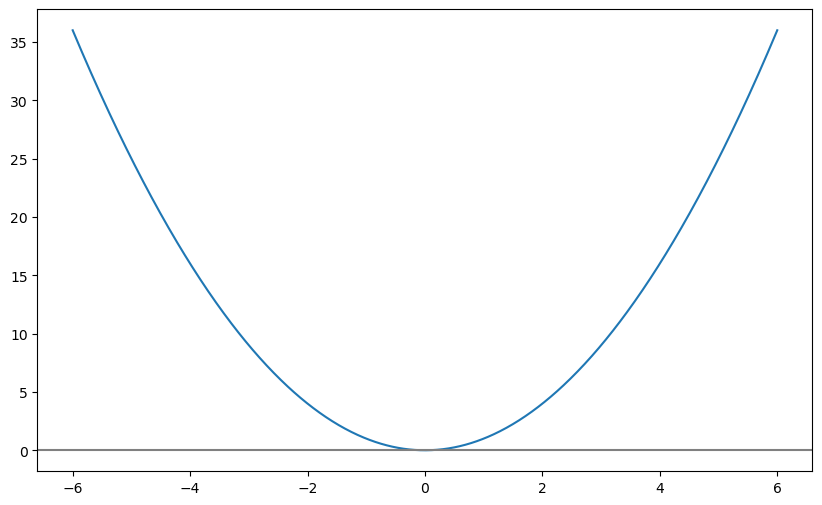

In [20]:
# Range of x values.
x = np.linspace(-6.0, 6.0, 1000)

# Create figure.
fig, ax = plt.subplots(figsize=(10,6))

# Plot.
ax.plot(x, x**2)

# Plot x axis.
ax.axhline(0.0, color='grey');

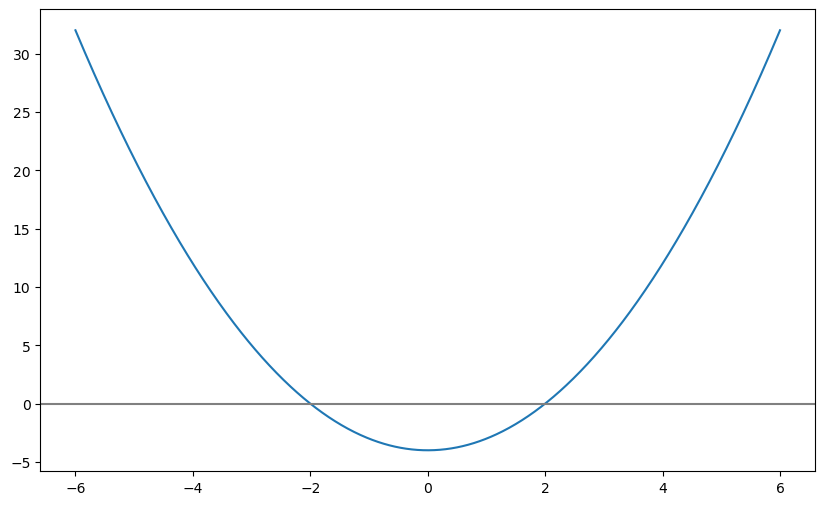

In [21]:
# Range of x values.
x = np.linspace(-6.0, 6.0, 1000)

# Create figure.
fig, ax = plt.subplots(figsize=(10,6))

# Plot.
ax.plot(x, x**2 - 4)

# Plot x axis.
ax.axhline(0.0, color='grey');

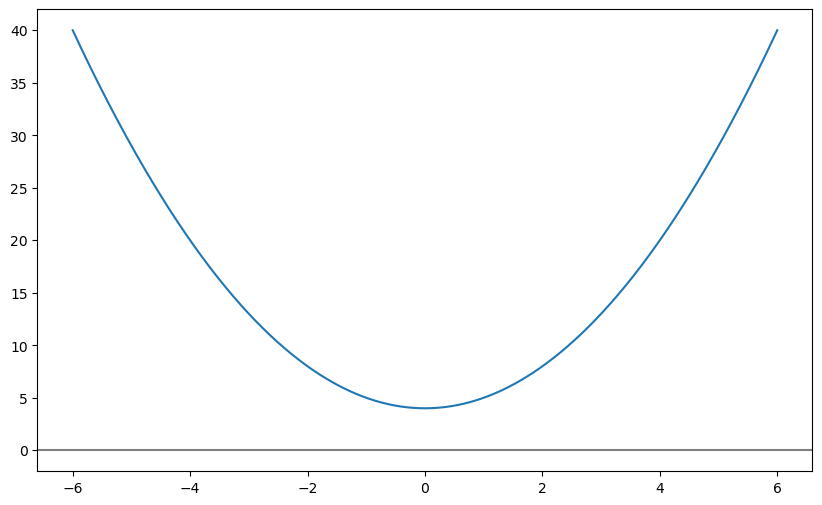

In [22]:
# Range of x values.
x = np.linspace(-6.0, 6.0, 1000)

# Create figure.
fig, ax = plt.subplots(figsize=(10,6))

# Plot.
ax.plot(x, x**2 + 4)

# Plot x axis.
ax.axhline(0.0, color='grey');

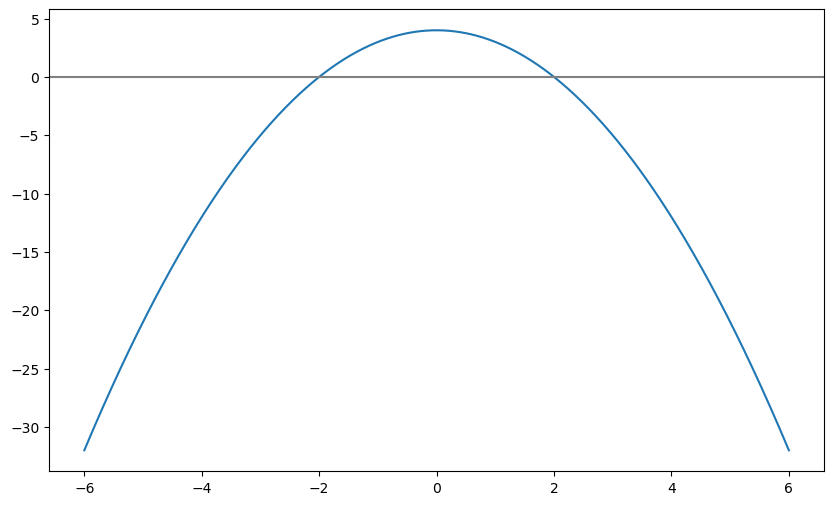

In [23]:
# Range of x values.
x = np.linspace(-6.0, 6.0, 1000)

# Create figure.
fig, ax = plt.subplots(figsize=(10,6))

# Plot.
ax.plot(x, -x**2 + 4)

# Plot x axis.
ax.axhline(0.0, color='grey');

## Quadratic Formula

***

$ f(x) = a x^2 + b x + c $

$ f(x) = 0 \Rightarrow x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$

In [24]:
def formula(a, b, c):
    undersqrt = (b**2 - 4 * a * c)**0.5
    return [(-b - undersqrt) / (2 * a), (-b + undersqrt) / (2 * a)]

In [25]:
# y = x^2
formula(1, 0, 0)

[0.0, 0.0]

In [26]:
# y = x^2 - 4
formula(1, 0, -4)

[-2.0, 2.0]

In [27]:
# y = x^2 + 4
formula(1, 0, 4)

[(-1.2246467991473532e-16-2j), (1.2246467991473532e-16+2j)]

In [28]:
# F strings.
x_0, x_1 = formula(1, 0, 4)
print(f'{x_0:.1f}, {x_1:.1f}')

-0.0-2.0j, 0.0+2.0j


## Fourier Transform

***

https://docs.scipy.org/doc/scipy/tutorial/fft.html#d-discrete-fourier-transforms:

In [29]:
# Numerical arrays.
import numpy as np

# Fast Fourier transform.
import scipy.fft as fft

In [30]:
# Create a test array.
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
x

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [31]:
# Apply the fast Fourier transform to x.
y = fft.fft(x)
y

array([ 4.5       -0.j        ,  2.08155948-1.65109876j,
       -1.83155948+1.60822041j, -1.83155948-1.60822041j,
        2.08155948+1.65109876j])

**Expected output**:

```
array([ 4.5       +0.j        ,  2.08155948-1.65109876j,
       -1.83155948+1.60822041j, -1.83155948-1.60822041j,
        2.08155948+1.65109876j])
```

## Inverse Fourier Transform

***

In [32]:
# Invert the previous Fourier transform applied to x.
yinv = fft.ifft(y)
yinv

array([ 1. +0.j,  2. +0.j,  1. +0.j, -1. +0.j,  1.5+0.j])

**Expected output:**

```
array([ 1.0+0.j,  2.0+0.j,  1.0+0.j, -1.0+0.j,  1.5+0.j])
```

We expect x and yinv to be equal.

In [33]:
# Are x and yinv equal?
x == yinv

array([False,  True,  True,  True,  True])

The first value seems suspicious.

In [34]:
x[0]

1.0

In [35]:
yinv[0]

(1.0000000000000002+0j)

In [36]:
# Adapted from: https://stackoverflow.com/a/39758154
np.isclose(x, yinv)

array([ True,  True,  True,  True,  True])

## Formula

***



$$
y[k] = \sum_{n=0}^{N-1} e^{-2 \pi j \frac{kn}{N}} x[n]
$$

In [37]:
# Calculate by hand.

# Output array.
y = []

N = len(x)

for k in range(N):
    y_k = 0.0
    for n in range(N):
        y_k = y_k + (np.e**(-2 * np.pi * 1j * k * n / N) * x[n])
    y.append(y_k)
    
np.array(y)

array([ 4.5       +0.j        ,  2.08155948-1.65109876j,
       -1.83155948+1.60822041j, -1.83155948-1.60822041j,
        2.08155948+1.65109876j])

In [38]:
# First element of output is just sum of x.
x.sum()

4.5

In [39]:
# From scipy.fft:
y[0]

(4.5+0j)

In [40]:
# Pi.
np.pi

3.141592653589793

In [41]:
# e
np.e

2.718281828459045

In [42]:
# j
1j

1j

In [43]:
# Absolute value/magnitude.
abs(y[1])

2.6568810651542054

In [44]:
# Symmetry.
np.sqrt(y[1] * y[4])

(2.656881065154206+2.5072022361544115e-16j)

In [45]:
# Symmetry.
f'{np.sqrt(y[1] * y[4]):.2f}'

'2.66+0.00j'

In [46]:
# Absolute value.
abs(1+2j)

2.23606797749979

## Example from scipy docs

***

https://docs.scipy.org/doc/scipy/tutorial/fft.html

In [47]:
import scipy

import matplotlib.pyplot as plt

In [48]:
# Number of samples.
N = 600

# Spacing between samples.
T = 1.0 / 800.0

# Range of x (input) values.
x = np.linspace(0.0, N*T, N, endpoint=False)

# Have a look at x.
x

array([0.     , 0.00125, 0.0025 , 0.00375, 0.005  , 0.00625, 0.0075 ,
       0.00875, 0.01   , 0.01125, 0.0125 , 0.01375, 0.015  , 0.01625,
       0.0175 , 0.01875, 0.02   , 0.02125, 0.0225 , 0.02375, 0.025  ,
       0.02625, 0.0275 , 0.02875, 0.03   , 0.03125, 0.0325 , 0.03375,
       0.035  , 0.03625, 0.0375 , 0.03875, 0.04   , 0.04125, 0.0425 ,
       0.04375, 0.045  , 0.04625, 0.0475 , 0.04875, 0.05   , 0.05125,
       0.0525 , 0.05375, 0.055  , 0.05625, 0.0575 , 0.05875, 0.06   ,
       0.06125, 0.0625 , 0.06375, 0.065  , 0.06625, 0.0675 , 0.06875,
       0.07   , 0.07125, 0.0725 , 0.07375, 0.075  , 0.07625, 0.0775 ,
       0.07875, 0.08   , 0.08125, 0.0825 , 0.08375, 0.085  , 0.08625,
       0.0875 , 0.08875, 0.09   , 0.09125, 0.0925 , 0.09375, 0.095  ,
       0.09625, 0.0975 , 0.09875, 0.1    , 0.10125, 0.1025 , 0.10375,
       0.105  , 0.10625, 0.1075 , 0.10875, 0.11   , 0.11125, 0.1125 ,
       0.11375, 0.115  , 0.11625, 0.1175 , 0.11875, 0.12   , 0.12125,
       0.1225 , 0.12

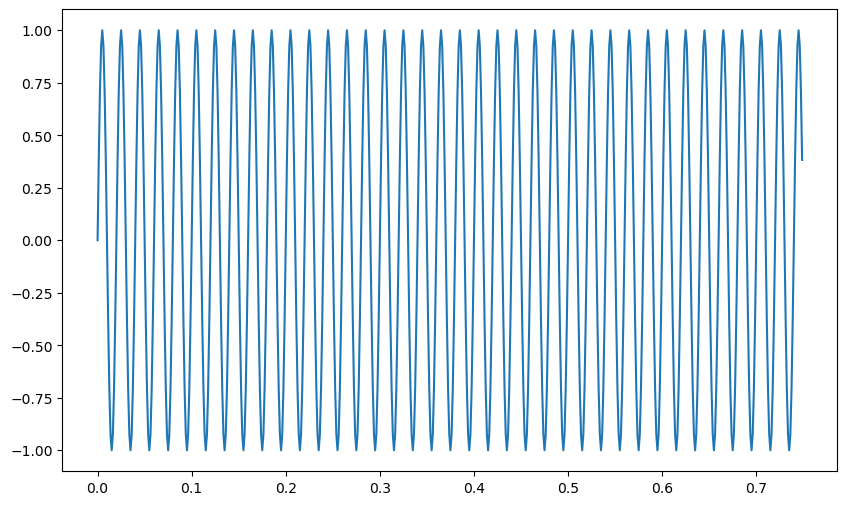

In [49]:
# First sine wave.
y_0 = np.sin(50.0 * 2.0 * np.pi * x)

# Plot it.
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y_0);

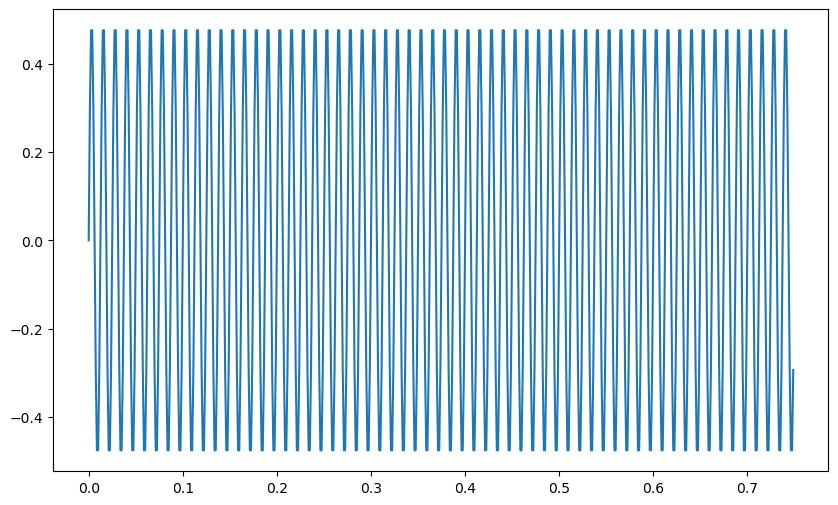

In [50]:
# First sine wave.
y_1 =  0.5 * np.sin(80.0 * 2.0 * np.pi * x)

# Plot it.
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y_1);

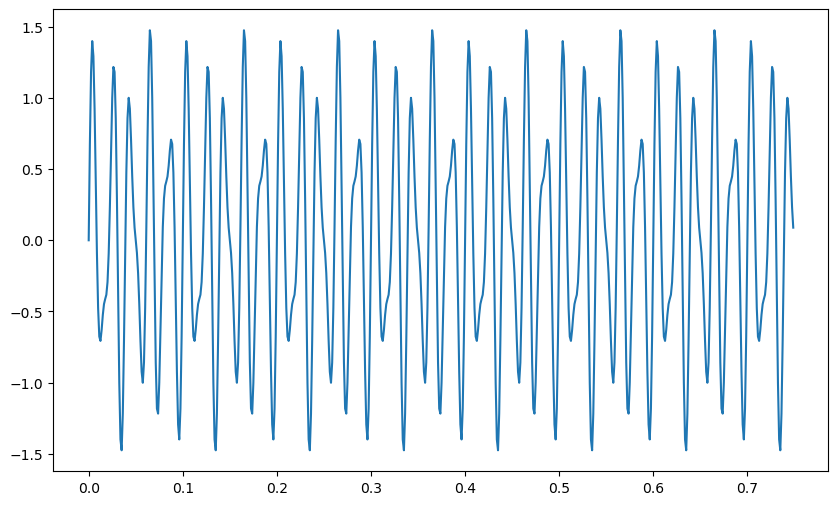

In [51]:
# Sum of the waves.
y = y_0 + y_1

# Plot it.
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y);

In [52]:
# Fast Fourier transform of y.
yf = scipy.fft.fft(y)

# Frequencies for y.
xf = scipy.fft.fftfreq(N, T)[:N//2]

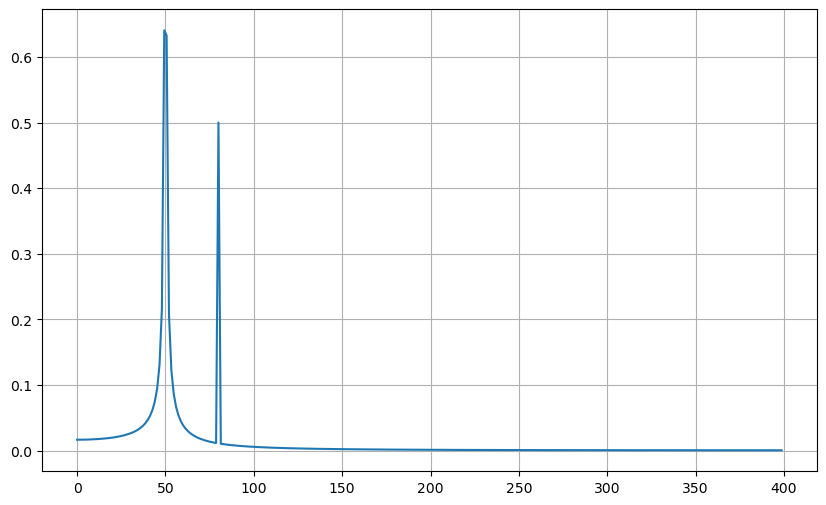

In [53]:
# First sine wave.
y_1 =  0.5 * np.sin(80.0 * 2.0 * np.pi * x)

# Plot it.
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid();

In [54]:
np.abs(3 + 2j)

3.605551275463989

In [55]:
np.sqrt(3**2 + 2**2)

3.605551275463989

In [56]:
np.sqrt((3+2j)*(3-2j))

(3.605551275463989+0j)

***

### End